In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Scocial Media Data Mining/SourceCode/Thu_LogisticRegression/UIT-VSMEC

/content/drive/.shortcut-targets-by-id/1CZcWZiWtxpQUuZayUBOYLquIpN5fLP1b/Scocial Media Data Mining/SourceCode/Thu_LogisticRegression/UIT-VSMEC


In [ ]:
#Thư's path
path= "/content/drive/MyDrive/Scocial Media Data Mining/"

# 1. Import thư viện

In [ ]:
import torch
import pandas as pd
import numpy as np
import pickle

In [ ]:
!pip install pyvi

     |████████████████████████████████| 8.5MB 5.1MB/s 
     |████████████████████████████████| 747kB 40.4MB/s 


In [ ]:
#Model
from sklearn.linear_model import LogisticRegression

#Tách từ
from pyvi import ViTokenizer, ViPosTagger
import re

#Xử lý label
from sklearn.preprocessing import LabelEncoder

#Xử lý biến đổi doc về dạng if-idf
from sklearn.feature_extraction.text import TfidfVectorizer

#Matrix đánh giá
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

# Vẽ đò thị
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import metrics

#Tạo report
from sklearn.metrics import classification_report

# 2. Load data

In [ ]:
train = pd.read_excel(path + "Dataset/UIT-VSMEC/train_nor_811.xlsx", index_col=False)
dev = pd.read_excel(path + "Dataset/UIT-VSMEC/valid_nor_811.xlsx", index_col=False)
test = pd.read_excel(path + "Dataset/UIT-VSMEC/test_nor_811.xlsx", index_col=False)

X_train = train['Sentence']
y_train = train['Emotion'].values

X_dev = dev['Sentence']
y_dev = dev['Emotion'].values

X_test = test['Sentence']
y_test = test['Emotion'].values

print(len(X_train))

X_train.sample(10)

5548


3071    nguyễn thị hồng phấn cũng may tao không thấy c...
204                                     trốn cũng đéo tha
771       nhớ quá , độ chục năm không đi soi ve rồi :((((
3749    ko biết ai phối ra cái giống ngáo vô địch này nữa
4357                            nhà nào nuôi nó mà ác thế
614                                 khổ nhất người có bầu
5177                                   buồn là cái gì mày
1744    móng của bố tao . hồi trước và bây giờ đã cắt ...
4557    t tưởng móc được mớ vụn ra là hết rồi . ai ngờ...
5546                      thích thân hình boss rồi nhan 😌
Name: Sentence, dtype: object

# 3. Tiền xử lý data

In [ ]:
#Load stop word
with open(path + "SourceCode/Thu_LogisticRegression/vietnamese-stopwords.txt") as f:
  stopwords = [x.rstrip() for x in f]
print(stopwords)

['a lô', 'a ha', 'ai', 'ai ai', 'ai nấy', 'ai đó', 'alô', 'amen', 'anh', 'anh ấy', 'ba', 'ba ba', 'ba bản', 'ba cùng', 'ba họ', 'ba ngày', 'ba ngôi', 'ba tăng', 'bao giờ', 'bao lâu', 'bao nhiêu', 'bao nả', 'bay biến', 'biết', 'biết bao', 'biết bao nhiêu', 'biết chắc', 'biết chừng nào', 'biết mình', 'biết mấy', 'biết thế', 'biết trước', 'biết việc', 'biết đâu', 'biết đâu chừng', 'biết đâu đấy', 'biết được', 'buổi', 'buổi làm', 'buổi mới', 'buổi ngày', 'buổi sớm', 'bà', 'bà ấy', 'bài', 'bài bác', 'bài bỏ', 'bài cái', 'bác', 'bán', 'bán cấp', 'bán dạ', 'bán thế', 'bây bẩy', 'bây chừ', 'bây giờ', 'bây nhiêu', 'bèn', 'béng', 'bên', 'bên bị', 'bên có', 'bên cạnh', 'bông', 'bước', 'bước khỏi', 'bước tới', 'bước đi', 'bạn', 'bản', 'bản bộ', 'bản riêng', 'bản thân', 'bản ý', 'bất chợt', 'bất cứ', 'bất giác', 'bất kì', 'bất kể', 'bất kỳ', 'bất luận', 'bất ngờ', 'bất nhược', 'bất quá', 'bất quá chỉ', 'bất thình lình', 'bất tử', 'bất đồ', 'bấy', 'bấy chầy', 'bấy chừ', 'bấy giờ', 'bấy lâu', 'bấy lâ

In [ ]:
#Xóa stop word
def remove_stopwords(line):
    words = []
    for word in line.strip().split():
        if word not in stopwords:
            words.append(word)
    return ' '.join(words)

#Tiền xử lý
def preProcess(X_data):
  X_data = X_data.lower() #Chuyển về chữ viết thường
  X_data = ViTokenizer.tokenize(X_data) #Tách từ
  X_data = re.sub(r'\W+', ' ', X_data) #Bỏ ký tự đặt biệt
  X_data = re.sub(r'\w*\d\w*', '', X_data).strip() #Xóa số và các từ chứa số
  X_data = remove_stopwords(X_data) #Xóa stop word
  return X_data

In [ ]:
X_train_pro = X_train.apply(preProcess)
X_test_pro = X_test.apply(preProcess)
X_dev_pro = X_dev.apply(preProcess)

In [ ]:
X_train_pro.sample(20)

568                                                  niềm
4213    tao đi học dô lớp lì thầy nằm úp bàn lớp kéo t...
5227    hahahaha tao mắc cười ghê hôm sinh_nhật tao gh...
5449                                         phim đầu nyc
5015                                             biển đục
4892                            bệnh_viện thành mẹ bãi xe
1577                        mày viết mày chặn giúp mày hả
2665                                               yên_ổn
4320                                          đi viện đẹp
1455                        vênh lắm đi bộ_đội yếu_ớt vãi
1292                                bài_học rút học buông
5527                       per cố đợi đi nha mua bảo_hiểm
328                                  per hiền hiền luônnn
1862                                         mặt mèo ghét
2685                   chả nói_chuyện thân_thiết quan_tâm
1331       chủ thương dòm husky ốm_nhom mắt lờ_đờ tội lắm
4440                                       cắt tóc đi đen
2138          

# 4. Xây dựng mô hình

In [ ]:
#Biến đổi nhãn về dạng số
le = LabelEncoder()
le.fit(y_train)
#Save le
with open('le.pkl', 'wb') as f:
    pickle.dump(le, f)

In [ ]:
y_train_encoding = le.transform(y_train)
y_dev_encoding = le.transform(y_dev)
y_test_encoding = le.transform(y_test)

In [ ]:
#Biến đỗi các doc về dạng if-idf
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train_pro)
print(tfidf_vect.vocabulary_) 
#Save tfidf_vect
with open('tfidf_vect.pkl', 'wb') as f:
    pickle.dump(tfidf_vect, f)

{'nhạc': 3050, 'đáng_đời': 5431, 'quỷ': 3555, 'lôi': 2274, 'mày': 2508, 'đánh': 5432, 'lo': 2158, 'học': 1769, 'đi': 5345, 'yêu_đương': 5198, 'lol': 2167, 'học_sinh_học': 1775, 'uớc': 4800, 'sau_này': 3703, 'già': 1289, 'có_thể': 804, 'cụ': 985, 'video': 4828, 'coi': 699, 'hoài': 1566, 'cưng': 884, 'thằng': 4144, 'kia': 1984, 'bắt': 299, 'vợ': 5013, 'bồ': 356, 'tao': 3911, 'dọn': 1166, 'thịt': 4173, 'chết': 618, 'lí_do': 2260, 'trog': 4337, 'muôn_vàn': 2491, 'đùa': 5483, 'ác_vậy': 5225, 'không_thể': 1943, 'ko': 2034, 'đau': 5323, 'huống': 1606, 'phẫn_nộ': 3407, 'cơ_quan_chức_năng': 874, 'làm_việc': 2217, 'chậm_trễ': 593, 'trách_nhiệm': 4372, 'per': 3305, 'khóc': 1924, 'trận': 4436, 'thoải_mái': 3992, 'đừng': 5707, 'cố': 959, 'gồng': 1447, 'công_nhận': 831, 'sáng_tạo': 3782, 'đấy': 5548, 'đòn': 5467, 'tấn_công': 4660, 'cực': 1010, 'gắt': 1437, 'cục': 986, 'sút': 3810, 'trời': 4467, 'nắng_nóng': 3233, 'bán_nước': 161, 'thu_nhập': 3996, 'minh': 2451, 'ne': 2719, 'mấy': 2605, 'củ': 989, 'v

In [ ]:
X_train_tfidf =  tfidf_vect.transform(X_train_pro)         
X_test_tfidf =  tfidf_vect.transform(X_test_pro)
X_dev_tfidf =  tfidf_vect.transform(X_dev_pro)

In [ ]:
#Mô hình LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train_encoding)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Save model
with open('LogisticRegression.pkl', 'wb') as f:
    pickle.dump(lr, f)

# 5. Đánh giá mô hình

In [ ]:
#Load model
with open('LogisticRegression.pkl', 'rb') as f:
    lr = pickle.load(f)

In [ ]:
# Danh gia mo hinh
y_true = y_test_encoding
y_pred = lr.predict(X_test_tfidf)

cf = confusion_matrix(y_true, y_pred, labels= pd.Series(y_true).unique())

print("accuracy: " + str(accuracy_score(y_true, y_pred)))
print("F1 - macro: " + str(f1_score(y_true, y_pred, average='macro'))+ '\n')
target_names = pd.Series(y_test).astype(str).unique()
print('Classification report in Training set')
print(classification_report(y_true, y_pred, labels=pd.Series(y_true).unique(), target_names=target_names))

accuracy: 0.4862914862914863
F1 - macro: 0.42922024710492696

Classification report in Training set
              precision    recall  f1-score   support

     Sadness       0.57      0.36      0.44       116
    Surprise       1.00      0.16      0.28        37
     Disgust       0.47      0.59      0.53       132
        Fear       0.81      0.46      0.58        46
       Anger       0.40      0.15      0.22        40
       Other       0.39      0.39      0.39       129
   Enjoyment       0.48      0.69      0.57       193

    accuracy                           0.49       693
   macro avg       0.59      0.40      0.43       693
weighted avg       0.52      0.49      0.47       693



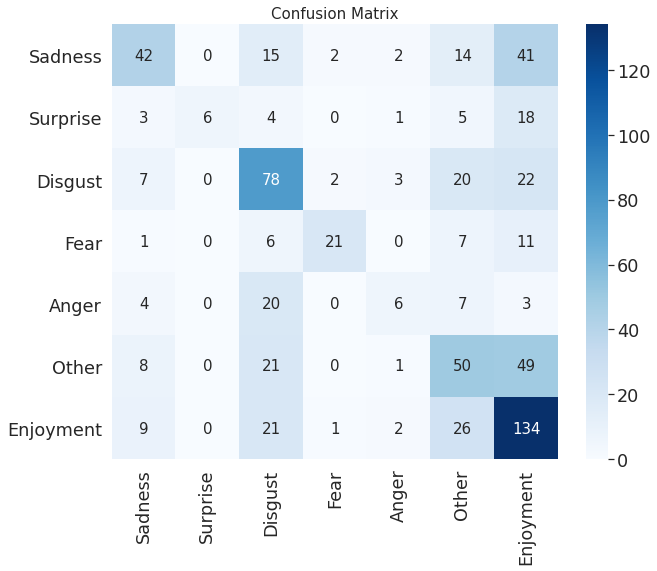

In [ ]:
# Ve ma tran nham lan
plt.figure(figsize=(10,8))
df_cm = pd.DataFrame(cf, index = pd.Series(y_test).unique(),
                  columns = pd.Series(y_test).unique())

ax = plt.subplot()
sn.set(font_scale=1.6) # Adjust to fit

# Labels, title and ticks
label_font = {'size':'15'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('Observed labels', fontdict=label_font);

title_font = {'size':'15'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font);

sn.heatmap(df_cm, annot=True, ax=ax, cmap="Blues", fmt="g", annot_kws={"size": 15});  

# Demo

In [ ]:
!pip install pyvi

     |████████████████████████████████| 8.5MB 6.4MB/s 
     |████████████████████████████████| 747kB 37.2MB/s 


In [ ]:
import pickle
import re
from pyvi import ViTokenizer, ViPosTagger

In [ ]:
#Load Stop word
with open(path + "SourceCode/Thu_LogisticRegression/vietnamese-stopwords.txt") as f:
  stopwords = [x.rstrip() for x in f]

#Xóa stop word
def remove_stopwords(line):
    words = []
    for word in line.strip().split():
        if word not in stopwords:
            words.append(word)
    return ' '.join(words)

#Tiền xử lý
def preProcess(X_data):
  X_data = X_data.lower()
  X_data = ViTokenizer.tokenize(X_data) #Tách từ
  X_data = re.sub(r'\W+', ' ', X_data) #Bỏ ký tự đặt biệt
  X_data = re.sub(r'\w*\d\w*', '', X_data).strip()
  X_data = remove_stopwords(X_data) #Xóa stop word
  return X_data

In [ ]:
#Load model
with open('LogisticRegression.pkl', 'rb') as f:
    lr = pickle.load(f)

In [ ]:
with open('le.pkl', 'rb') as f:
    le = pickle.load(f)
with open('tfidf_vect.pkl', 'rb') as f:
    tfidf_vect = pickle.load(f)

In [ ]:
Sentence = input("Enter sentence: ")
Sentence = preProcess(Sentence)
Sentence_tfidf = tfidf_vect.transform([Sentence])
result = lr.predict(Sentence_tfidf)
print('Emotion: ', le.inverse_transform(result))

Enter sentence: Buồn ghê
Emotion:  ['Sadness']
